# GRIP @The Sparks Foundation Internship 
# Author : Gouri Zade
## Data Science and Business Analytics Intern
### Task 2 : Prediction using Unsupervised Machine Learning

On the Iris Data, I will be utilizing the K-means clustering technique,that aims to group similar data points together based on their similarities and I will represent it visually.

# Import the Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
# import the data
data = pd.read_csv('/content/drive/MyDrive/The Sparks Foundation Internship/Task 2 = Unsupervised Ml/Iris.csv')

# display the first 5 rows
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Pre-Processing 

* **Taking Required Features for Clustering**

In [3]:
data = data.drop(['Id', 'Species'], axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* **Data Type Info**



In [4]:
# Checking datatypes of features
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

* **Data Shape**

In [5]:
data.shape # 150 rows  # 4 columns

(150, 4)

* **Missing Values**

In [6]:
# Checking missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

* **Extract Values**

In [7]:
# to get all rows values
X = data.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
WCSS = [] # within-cluster sum-of-squares

for k in range(1,8):# Create a KMeans instance with k clusters:
    model = KMeans(n_clusters=k, random_state=42) # k =1,2,3,4,5,6,7
    model.fit(X)# Fit model to samples
    WCSS.append(model.inertia_) # Append the inertia to the list of inertias

# Elbow Chart

* **Plotting inertia to see which number of clusters is best**

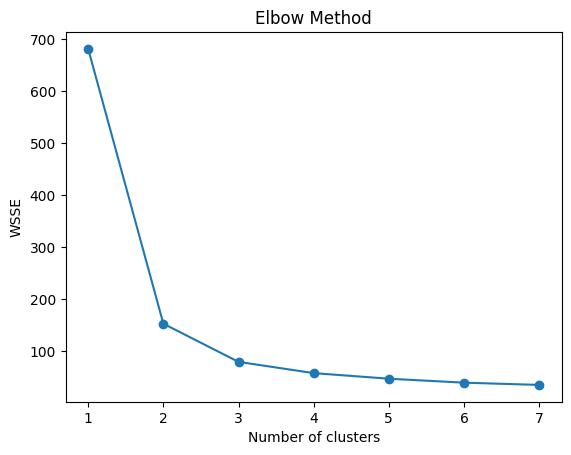

In [9]:
plt.plot(range(1, 8), WCSS, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

* From the plot above, elbow point occurs at **k=3**, which suggests that three clusters will be the optimal number of clusters.

# K-Means Clustering Model

In [10]:
# Fit KMeans algorithm with n_clusters=3
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualise the Clusters
* **Plot the clusters using the first two features, Sepal length and Sepal width.**

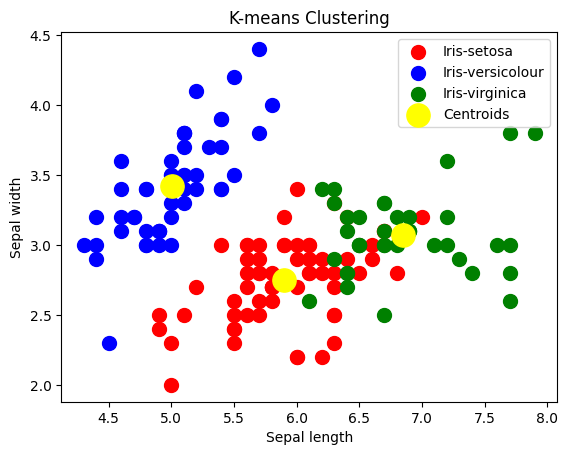

In [11]:
# Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label= 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=280, c='yellow', label='Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-means Clustering')
plt.legend()
plt.show()

* We can see that the K-means algorithm has successfully separated the instances into three distinct clusters based on the Sepal length and Sepal width features.